In [1]:
import pandas as pd
import numpy as np
import imblearn
import sklearn
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from scipy.stats import chi2, norm

In [2]:
d0 = 2.2758723557913747
#d0=0

In [3]:
dataC1C3 = []
with open('../data/likelihood_rotBIII_C1C3.dat', 'rt') as f:
    xmin = -0.3
    xmax = 0.0
    ymin = -0.3
    ymax = 0.0
    xmargin = 0.02*(xmax-xmin)
    ymargin = 0.02*(ymax-ymin)
    num = 0
    for l in f.readlines():
        for v in l.split('\t'):
            ix = num % 50
            iy = num // 50
            x = (xmin-xmargin) + ix/50 * ((xmax+xmargin) - (xmin-xmargin))
            y = (ymin-ymargin) + iy/50 * ((ymax+ymargin) - (ymin-ymargin))
            dataC1C3.append({'C1': x, 'C3': y, 'bq': 0.6409892, 'likelihood': float(v)-d0})
            num += 1

In [4]:
with open('../data/likelihood_rotBIII_C1beta.dat', 'rt') as f:
    xmin = -0.3
    xmax = 0.0
    ymin = 0.0
    ymax = 3.2
    xmargin = 0.02*(xmax-xmin)
    ymargin = 0.02*(ymax-ymin)
    num = 0
    for l in f.readlines():
        for v in l.split('\t'):
            ix = num % 50
            iy = num // 50
            x = (xmin-xmargin) + ix/50 * ((xmax+xmargin) - (xmin-xmargin))
            y = (ymin-ymargin) + iy/50 * ((ymax+ymargin) - (ymin-ymargin))
            dataC1C3.append({'C1': x, 'C3': -0.12670602, 'bq': y, 'likelihood': float(v)-d0})
            num += 1

In [5]:
with open('../data/likelihood_rotBIII_C3beta.dat', 'rt') as f:
    xmin = -0.3
    xmax = 0.0
    ymin = 0.0
    ymax = 3.2
    xmargin = 0.02*(xmax-xmin)
    ymargin = 0.02*(ymax-ymin)
    num = 0
    for l in f.readlines():
        for v in l.split('\t'):
            ix = num % 50
            iy = num // 50
            x = (xmin-xmargin) + ix/50 * ((xmax+xmargin) - (xmin-xmargin))
            y = (ymin-ymargin) + iy/50 * ((ymax+ymargin) - (ymin-ymargin))
            dataC1C3.append({'C1': -0.10766202, 'C3': x, 'bq': y, 'likelihood': float(v)-d0})
            num += 1

In [6]:
pd.DataFrame(dataC1C3).to_csv('../data/plotdata.csv', index=False)

In [7]:
data_random = pd.read_csv('../data/random.dat', names=['C1', 'C3', 'bq', 'likelihood'])
data_plot = pd.read_csv('../data/plotdata.csv')

In [8]:
drandom = data_random.loc[data_random['likelihood']>-50]
dplot = data_plot.loc[data_plot['likelihood']>-50]

In [9]:
drandom.loc[drandom['likelihood']>21.34]

,C1,C3,bq,likelihood
339,-0.202518,-0.116786,0.603828,21.343628
414,-0.203218,-0.117650,0.616077,21.342136
423,-0.203033,-0.118042,0.605789,21.340742
433,-0.203741,-0.118019,0.612643,21.340285
442,-0.203495,-0.117902,0.613453,21.341588
449,-0.203250,-0.117325,0.614760,21.340347
469,-0.203190,-0.118378,0.615954,21.340895
477,-0.202955,-0.117640,0.608979,21.344124


In [10]:
dplot.loc[dplot['likelihood']>21.34]

,C1,C3,bq,likelihood
2860,-0.243600,-0.126706,0.40192,21.742558
2861,-0.237360,-0.126706,0.40192,22.240759
2862,-0.231120,-0.126706,0.40192,22.399954
2863,-0.224880,-0.126706,0.40192,22.280578
2864,-0.218640,-0.126706,0.40192,21.942785
...,...,...,...,...
6428,-0.107662,-0.131280,1.79968,21.709595
6429,-0.107662,-0.125040,1.79968,21.648114
6478,-0.107662,-0.131280,1.86624,21.539118
6479,-0.107662,-0.125040,1.86624,21.488022


In [11]:
data = pd.concat([drandom, dplot], ignore_index=True)

In [12]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [13]:
groups = []
for i in data.index:
    if data['likelihood'][i] < 16:
        groups.append(0)
    elif data['likelihood'][i] < 18:
        groups.append(1)
    #elif drandom['likelihood'][i] < 20:
    #    groups.append(2)
    else:
        groups.append(3)

groups = pd.Series(groups, index=data.index)

In [14]:
sm = imblearn.over_sampling.SMOTE()
dataset, ysmote = sm.fit_resample(data, groups)

In [15]:
dataset

,C1,C3,bq,likelihood
0,-0.138488,-0.010770,0.370295,5.474736
1,-0.087530,-0.108767,2.733118,17.126846
2,-0.107593,-0.043615,0.519066,12.238064
3,-0.092117,-0.160923,2.961446,13.541590
4,-0.198850,-0.233758,1.431361,-3.547059
...,...,...,...,...
11683,-0.104447,-0.126706,1.799680,21.498690
11684,-0.137520,-0.126706,0.845713,19.523396
11685,-0.139874,-0.126706,2.465280,18.464458
11686,-0.187440,-0.126706,0.743457,22.124552


In [16]:
np.max(dataset['likelihood'])

23.333017871424843

In [17]:
import sklearn.model_selection


training, validation = sklearn.model_selection.train_test_split(dataset)

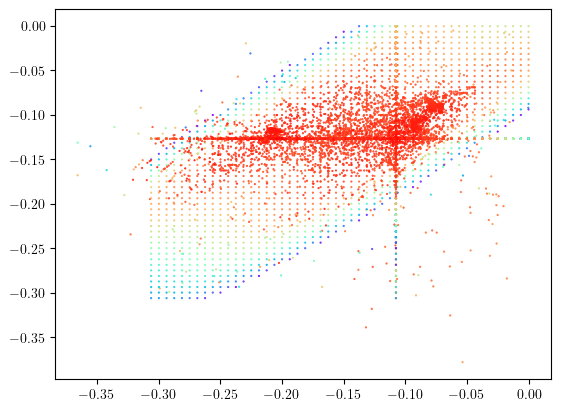

In [18]:
plt.scatter(dataset['C1'], dataset['C3'], c=dataset['likelihood'], cmap='rainbow', s=0.3)

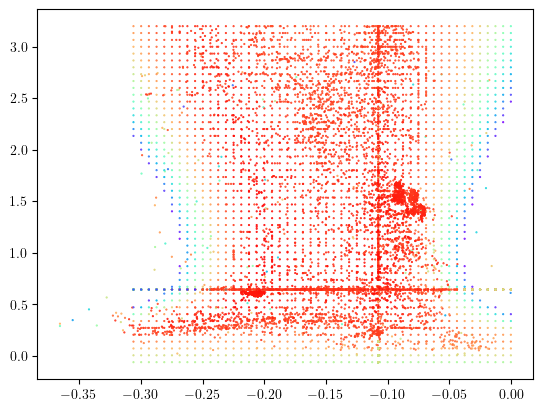

In [19]:
plt.scatter(dataset['C1'], dataset['bq'], c=dataset['likelihood'], cmap='rainbow', s=0.3)

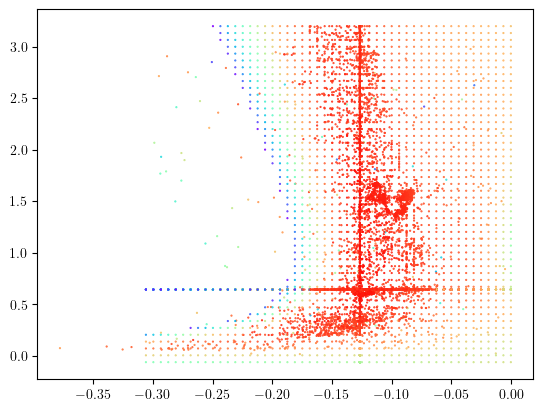

In [20]:
plt.scatter(dataset['C3'], dataset['bq'], c=dataset['likelihood'], cmap='rainbow', s=0.3)

In [21]:
trainX = training[['C1', 'C3', 'bq']]

In [22]:
trainY = training['likelihood']

In [23]:
valX = validation[['C1', 'C3', 'bq']]
valY = validation['likelihood']

In [24]:
import xgboost

In [25]:
import xgboost.callback


earlystop = xgboost.callback.EarlyStopping(5, data_name='validation_0', save_best=True)

xr = xgboost.XGBRegressor(n_estimators=3000, callbacks=[earlystop], learning_rate=0.03)
xr.fit(trainX, trainY, eval_set=[(valX, valY)])

[0]	validation_0-rmse:16.92546
[1]	validation_0-rmse:16.50016
[2]	validation_0-rmse:16.08994
[3]	validation_0-rmse:15.69351
[4]	validation_0-rmse:15.30853
[5]	validation_0-rmse:14.93641
[6]	validation_0-rmse:14.57563
[7]	validation_0-rmse:14.22760
[8]	validation_0-rmse:13.88746
[9]	validation_0-rmse:13.56512
[10]	validation_0-rmse:13.25719
[11]	validation_0-rmse:12.95455
[12]	validation_0-rmse:12.65804
[13]	validation_0-rmse:12.38085
[14]	validation_0-rmse:12.09989
[15]	validation_0-rmse:11.83456
[16]	validation_0-rmse:11.57990
[17]	validation_0-rmse:11.34100
[18]	validation_0-rmse:11.09461
[19]	validation_0-rmse:10.86046
[20]	validation_0-rmse:10.63632
[21]	validation_0-rmse:10.42077
[22]	validation_0-rmse:10.22132
[23]	validation_0-rmse:10.01381
[24]	validation_0-rmse:9.81460
[25]	validation_0-rmse:9.63749
[26]	validation_0-rmse:9.45261
[27]	validation_0-rmse:9.28571
[28]	validation_0-rmse:9.11854
[29]	validation_0-rmse:8.94725
[30]	validation_0-rmse:8.80062
[31]	validation_0-rmse:8.

XGBRegressor(base_score=None, booster=None,
             callbacks=[<xgboost.callback.EarlyStopping object at 0x7ff42c099570>],
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [26]:
xr.save_model('xgboost_scIII.json')

/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM3yKA-py3.10/lib64/python3.10/site-packages/xgboost/sklearn.py:761: UserWarning: callbacks is not saved in Scikit-Learn meta.
  warnings.warn(


In [132]:
def predict_point(C1, C3, bq):
    if C1 > 0:
        fC1 = np.exp(C1*50)-1
    elif C1 < -0.3:
        fC1 = np.exp((-C1-0.3)*50)-1
    else:
        fC1 = 0.0
    if C3 > 0:
        fC3 = np.exp(C3*50)-1
    elif C3 < -0.3:
        fC3 = np.exp((-C3-0.3)*50)-1
    else:
        fC3 = 0.0
    if bq < 0:
        fbq = np.exp(-bq*50)-1
    elif bq > 3.2:
        fbq = np.exp((bq-3.2)*50)-1
    else:
        fbq = 0.0
    return xr.predict(pd.DataFrame([{'C1': C1, 'C3': C3, 'bq': bq},]))[0]-fC1-fC3-fbq

In [81]:
predict_point(-0.10766202, -0.12670602, 0.6409892)

20.300071716308594

In [133]:
predict_point(-0.32, -0.2, 5.2)

-2.6881171418161356e+43

In [88]:
pred_val = xr.predict(valX)

In [89]:
pred_val

array([ 0.03663006, 17.785799  , 21.231478  , ..., 16.96955   ,
       16.961935  , 17.956272  ], dtype=float32)

In [90]:
valY

1511      0.577010
21       17.368577
11441    22.244522
6985     17.285687
4095    -38.076012
           ...    
774      18.718449
5539      9.323535
8663     17.459896
4830     16.820096
9196     17.234496
Name: likelihood, Length: 2922, dtype: float64

(20.0, 47.0)

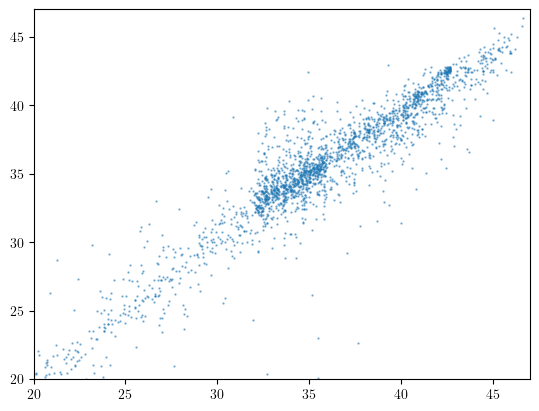

In [91]:
plt.scatter(2*valY, 2*pred_val, s=0.5, alpha=0.5)
plt.xlim(20, 47)
plt.ylim(20,47)

In [34]:
from scipy.stats import pearsonr

In [92]:
pearsonr(2*valY, 2*pred_val)

PearsonRResult(statistic=0.9885987653606844, pvalue=0.0)

In [134]:
#point = (-0.10766202+np.random.normal(0, 0.005), -0.12670602+np.random.normal(0, 0.005), 0.6409892+np.random.normal(0, 0.05))
point = (-0.3+0.3*np.random.random(), -0.3+0.3*np.random.random(), 2.5*np.random.random())

In [135]:
bf = [-0.10766202, -0.12670602, 0.6409892]
lhbf = predict_point(*bf)

In [136]:
points = [point]
lh = [predict_point(*point)]
prob = [chi2(3).pdf(2*lhbf-2*lh[0])]

In [145]:
rejected = 0
while len(points) < 20000:
    #new = (-0.10766202+np.random.normal(0, 0.03), -0.12670602+np.random.normal(0, 0.03), 0.6409892+np.random.normal(0, 0.3))
    new = (points[-1][0]+np.random.normal(0, 0.03), points[-1][1]+np.random.normal(0, 0.03), points[-1][2]+np.random.normal(0, 0.6))
    lhnew = predict_point(*new)
    probnew = chi2(3).pdf(2*lhbf-2*lhnew)
    if probnew/prob[-1] > np.random.uniform():
        point = np.array([new[0], new[1], new[2]])
        points.append(new)
        lh.append(lhnew)
        prob.append(probnew)
    else:
        rejected += 1

In [146]:
rejected

23006

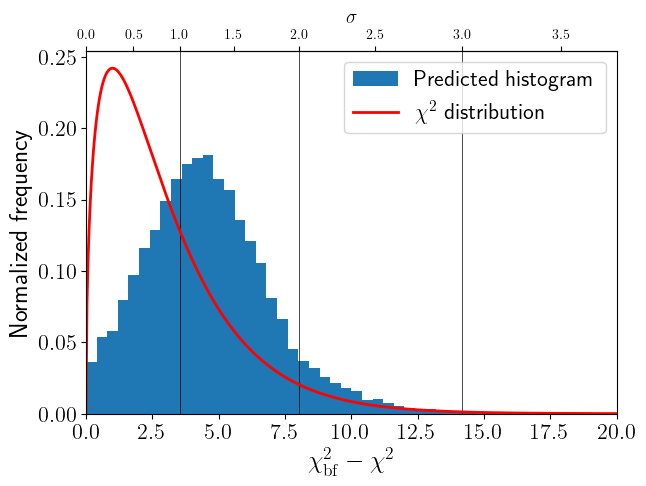

In [147]:

plt.axvline(chi2(3).ppf(2*norm.cdf(1)-1), lw=0.5, c='k')
plt.axvline(chi2(3).ppf(2*norm.cdf(2)-1), lw=0.5, c='k')
plt.axvline(chi2(3).ppf(2*norm.cdf(3)-1), lw=0.5, c='k')
#_=plt.hist(2*(30.5-np.array(lh[200:])), bins=50, density=True, label='Predicted histogram', range=(0,20))
_=plt.hist(2*(np.max(lh)-np.array(lh[200:])), bins=50, density=True, label='Predicted histogram', range=(0,20))
plt.plot(np.linspace(0,20,500), chi2(3).pdf(np.linspace(0,20,500)), label=r'$\chi^2$ distribution', lw=2, c='r')
plt.xlim(0,20)
plt.xlabel(r'$\chi^2_\mathrm{bf} - \chi^2$', fontsize=18)
plt.ylabel('Normalized frequency', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax2 = ax.secondary_xaxis('top', functions=(lambda x: norm.ppf(0.5+0.5*chi2(3).cdf(x)), lambda x: chi2(3).ppf(2*norm.cdf(x)-1)))
ax2.set_xlabel(r'$\sigma$', fontsize=14)
plt.tight_layout(pad=0.5)
plt.savefig('hist_xgb_III.pdf')

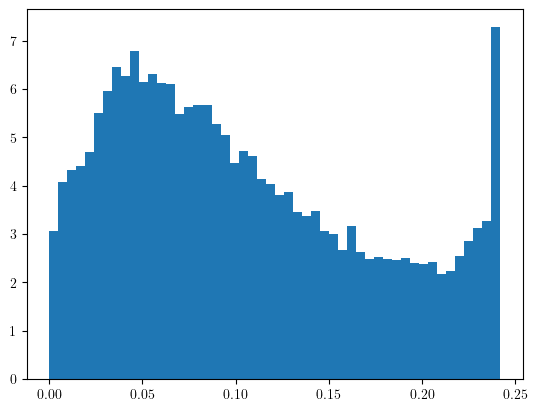

In [148]:
_ = plt.hist(prob, bins=50, density=True)

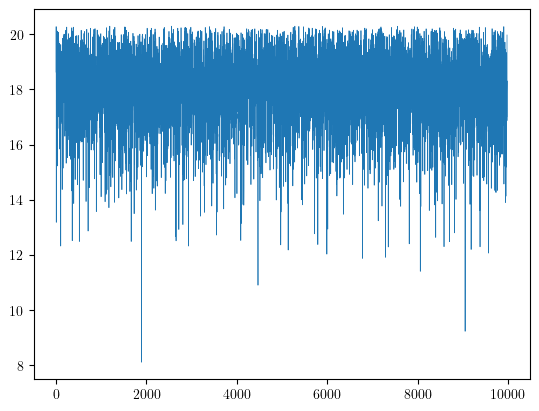

In [140]:
plt.plot(lh[20:], lw=0.5)

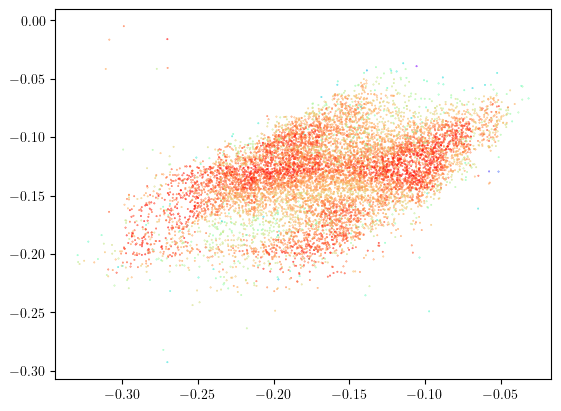

In [141]:
plt.scatter([p[0] for p in points[200:]], [p[1] for p in points[200:]], s=0.1, c=lh[200:], cmap='rainbow')

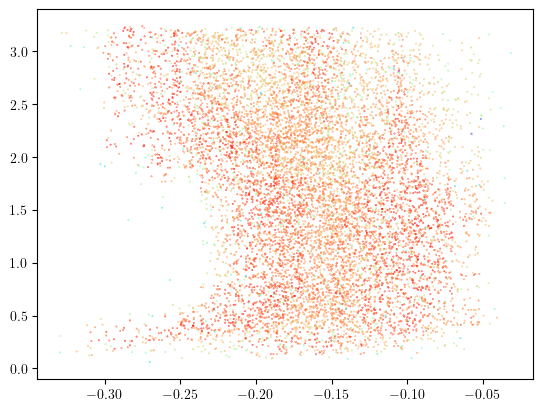

In [142]:
plt.scatter([p[0] for p in points[200:]], [p[2] for p in points[200:]], s=0.1, c=lh[200:], cmap='rainbow')

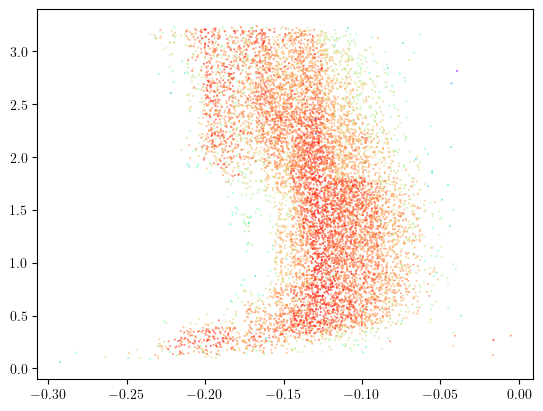

In [144]:
plt.scatter([p[1] for p in points[200:]], [p[2] for p in points[200:]], s=0.1, c=lh[200:], cmap='rainbow')

In [126]:
points[-1]

(-0.3202501216840032, -0.2017730468763114, 122.7813955500925)

In [149]:
import flavio
from scenarios import rotBIII
from wilson import Wilson
import warnings
warnings.simplefilter('ignore')

In [150]:
observables = []

for i in range(1_000):
    wc = rotBIII(points[5000+i])
    wc_low = Wilson.from_wc(wc.match_run(4.8, 'WET', 'flavio'))
    obs = {}
    obs |= {'RD': flavio.np_prediction('Rtaul(B->Dlnu)', wc_low)}
    obs |= {'RD*': flavio.np_prediction('Rtaul(B->D*lnu)', wc_low)}
    obs |= {'RD*_mu': flavio.np_prediction('Rtaumu(B->D*lnu)', wc_low)}
    obs |= {'RJpsi': flavio.np_prediction('Rtaul(Bc->J/psilnu)', wc_low)}
    obs |= {'BKnunu': flavio.np_prediction('BR(B+->Knunu)', wc_low)}
    obs |= {'BKsnunu': flavio.np_prediction('BR(B0->K*nunu)', wc_low)}
    obs |= {'RK': flavio.np_prediction('<Rmue>(B+->Kll)', wc_low, 1.1, 6.0)}
    obs |= {'RK*': flavio.np_prediction('<Rmue>(B0->K*ll)', wc_low, 1.1, 6.0)}
    obs |= {'RK*_low': flavio.np_prediction('<Rmue>(B0->K*ll)', wc_low, 0.045, 1.1)}
    observables.append(obs)

pd.DataFrame(observables).to_csv('observables.csv', index=False)

In [2]:
observables = pd.read_csv('observables.csv')

In [12]:
np.cov(observables['RD*'], observables['BKnunu']*1e5)

array([[7.12764266e-05, 9.05890253e-05],
       [9.05890253e-05, 1.57465692e-01]])

In [9]:
np.corrcoef(observables['RD*'], observables['BKnunu'])

array([[1.        , 0.02704018],
       [0.02704018, 1.        ]])

In [174]:
observables.describe()

,RD,RD*,RD*_mu,RJpsi,BKnunu,BKsnunu,RK,RK*,RK*_low
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.343509,0.283080,0.283531,0.298817,0.000007,0.000016,1.000911,0.996076,0.924465
std,0.010245,0.008443,0.008456,0.008912,0.000004,0.000009,0.000032,0.000081,0.000219
min,0.309798,0.255299,0.255706,0.269492,0.000003,0.000006,1.000816,0.995841,0.923888
25%,0.336389,0.277213,0.277655,0.292624,0.000004,0.000008,1.000887,0.996021,0.924312
50%,0.343239,0.282858,0.283308,0.298583,0.000006,0.000014,1.000911,0.996074,0.924455
75%,0.350324,0.288697,0.289157,0.304746,0.000009,0.000020,1.000932,0.996136,0.924621
max,0.374651,0.308745,0.309237,0.325909,0.000022,0.000047,1.001009,0.996332,0.925210


In [5]:
np.mean(observables['BKnunu'])

7.187924218905508e-06

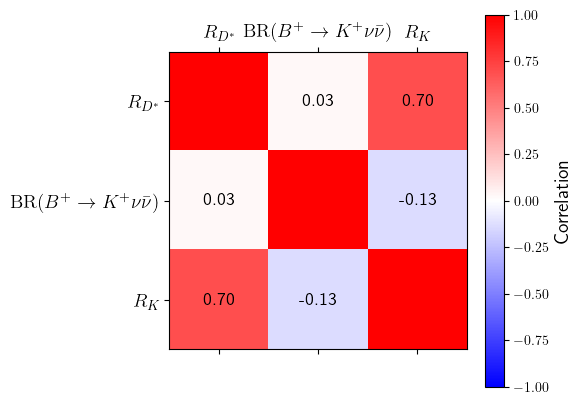

In [152]:
corr = observables[['RD*', 'BKnunu', 'RK']].corr()
plt.matshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.xticks([0,1,2], [r'$R_{D^*}$', r'$\mathrm{BR}(B^+\to K^+\nu\bar{\nu})$', r'$R_K$'], fontsize=14)
plt.yticks([0,1,2], [r'$R_{D^*}$', r'$\mathrm{BR}(B^+\to K^+\nu\bar{\nu})$', r'$R_K$'], fontsize=14)
for i in range(3):
    for j in range(3):
        if i != j:
            plt.text(i, j, f'{corr.values[i,j]:.2f}', ha='center', va='center', fontsize=13)
cbar = plt.colorbar()
cbar.set_label('Correlation', fontsize=14)

In [153]:
import flavio
from scenarios import rotBIII
import warnings
warnings.simplefilter('ignore')

In [154]:
RDs_1s = []
BKnunu_1s = []
RDs_2s = []
BKnunu_2s = []

for p, l in zip(points, lh):
    if l > 18-0.5*chi2(3).ppf(2*norm.cdf(1)-1):
        RDs_1s.append(flavio.np_prediction('Rtaul(B->D*lnu)', rotBIII(p)))
        BKnunu_1s.append(flavio.np_prediction('BR(B+->Knunu)', rotBIII(p)))
    elif l > 18-0.5*chi2(3).ppf(2*norm.cdf(2)-1):
        RDs_2s.append(flavio.np_prediction('Rtaul(B->D*lnu)', rotBIII(p)))
        BKnunu_2s.append(flavio.np_prediction('BR(B+->Knunu)', rotBIII(p)))
    if len(RDs_1s) > 1500:
        break
    

In [155]:
RDs_1s_d = []
BKnunu_1s_d = []
RDs_2s_d = []
BKnunu_2s_d = []

for i in drandom.index:
    l = drandom['likelihood'][i]
    p = [drandom['C1'][i], drandom['C3'][i], drandom['bq'][i]]
    if l > np.max(drandom['likelihood'])-0.5*chi2(3).ppf(2*norm.cdf(1)-1):
        RDs_1s_d.append(flavio.np_prediction('Rtaul(B->D*lnu)', rotBIII(p)))
        BKnunu_1s_d.append(flavio.np_prediction('BR(B+->Knunu)', rotBIII(p)))
    elif l > np.max(drandom['likelihood'])-0.5*chi2(3).ppf(2*norm.cdf(2)-1):
        RDs_2s_d.append(flavio.np_prediction('Rtaul(B->D*lnu)', rotBIII(p)))
        BKnunu_2s_d.append(flavio.np_prediction('BR(B+->Knunu)', rotBIII(p)))
    if len(RDs_1s_d) > 1500:
        break

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()
scaler.fit(pd.DataFrame({'RD': RDs_2s, 'BKnuu': BKnunu_2s}))

StandardScaler()

In [158]:
scaled_1s = scaler.transform(pd.DataFrame({'RD': RDs_1s, 'BKnuu': BKnunu_1s}))
scaled_2s = scaler.transform(pd.DataFrame({'RD': RDs_2s, 'BKnuu': BKnunu_2s}))

In [159]:
kde_1sigma = kde2D(np.array([s[0] for s in scaled_1s]), np.array([s[1] for s in scaled_1s]), 0.25)

kde_2sigma = kde2D(np.array([s[0] for s in scaled_2s]+[s[0] for s in scaled_1s]), np.array([s[1] for s in scaled_2s]+[s[1] for s in scaled_1s]),  0.25)

In [160]:
scaled_1s_d = scaler.transform(pd.DataFrame({'RD': RDs_1s_d, 'BKnuu': BKnunu_1s_d}))
scaled_2s_d = scaler.transform(pd.DataFrame({'RD': RDs_2s_d, 'BKnuu': BKnunu_2s_d}))

In [161]:
kde_1sigma_d = kde2D(np.array([s[0] for s in scaled_1s_d]), np.array([s[1] for s in scaled_1s_d]), 0.25)

kde_2sigma_d = kde2D(np.array([s[0] for s in scaled_2s_d]+[s[0] for s in scaled_1s_d]), np.array([s[1] for s in scaled_2s_d]+[s[1] for s in scaled_1s_d]),  0.25)

In [117]:
points[7000]

(-0.09812624635843997, -0.1328766883938361, 0.6010340932394573)

In [162]:
flavio.np_prediction('BR(B+->Knunu)', rotBIII(points[-1]))

1.2627674257584013e-05

In [163]:
xx_1sigma, yy_1sigma = np.mgrid[min(RDs_1s):max(RDs_1s):100j,min(BKnunu_1s):max(BKnunu_1s):100j]

xx_2sigma, yy_2sigma = np.mgrid[min(RDs_2s):max(RDs_2s):100j,min(BKnunu_2s):max(BKnunu_2s):100j]

In [164]:
xx_1sigma_d, yy_1sigma_d = np.mgrid[min(RDs_1s_d):max(RDs_1s_d):100j,min(BKnunu_1s_d):max(BKnunu_1s_d):100j]

xx_2sigma_d, yy_2sigma_d = np.mgrid[min(RDs_2s_d):max(RDs_2s_d):100j,min(BKnunu_2s_d):max(BKnunu_2s_d):100j]

In [165]:
np.max(kde_1sigma[2])

0.43671557887822654

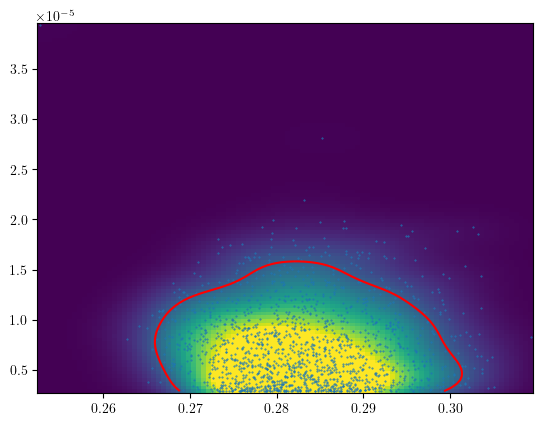

In [166]:
plt.pcolormesh(xx_1sigma, yy_1sigma, kde_1sigma[2], vmin=0, vmax=0.5*np.max(kde_1sigma[2]))
plt.contour(xx_1sigma, yy_1sigma, kde_1sigma[2], levels=[0.15*np.max(kde_1sigma[2])], colors='r')
plt.scatter(RDs_1s, BKnunu_1s, s=0.2)

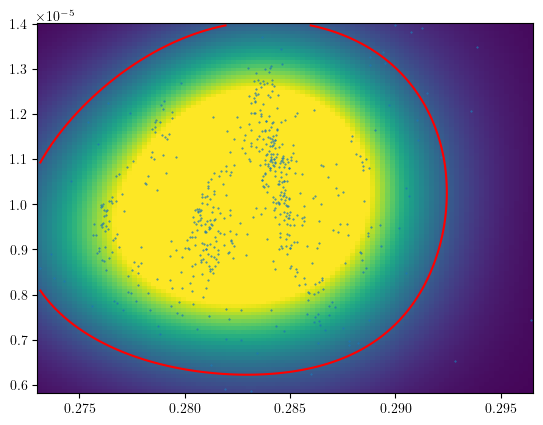

In [167]:
plt.pcolormesh(xx_1sigma_d, yy_1sigma_d, kde_1sigma_d[2], vmin=0, vmax=0.5*np.max(kde_1sigma_d[2]))
plt.contour(xx_1sigma_d, yy_1sigma_d, kde_1sigma_d[2], levels=[0.15*np.max(kde_1sigma_d[2])], colors='r')
plt.scatter(RDs_1s_d, BKnunu_1s_d, s=0.2)

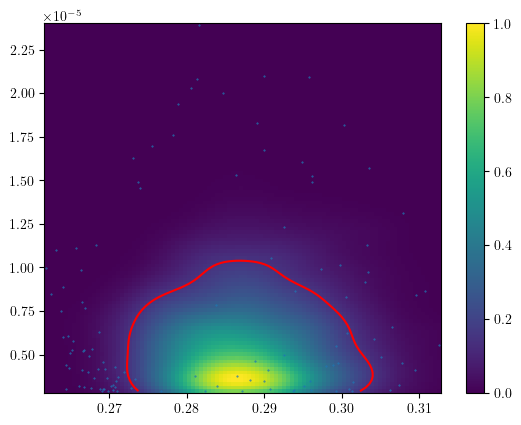

In [168]:
plt.pcolormesh(xx_2sigma, yy_2sigma, kde_2sigma[2])
plt.contour(xx_2sigma, yy_2sigma, kde_2sigma[2], levels=[0.15*np.max(kde_2sigma[2])], colors='r')
plt.scatter(RDs_2s, BKnunu_2s, s=0.2)
plt.colorbar()

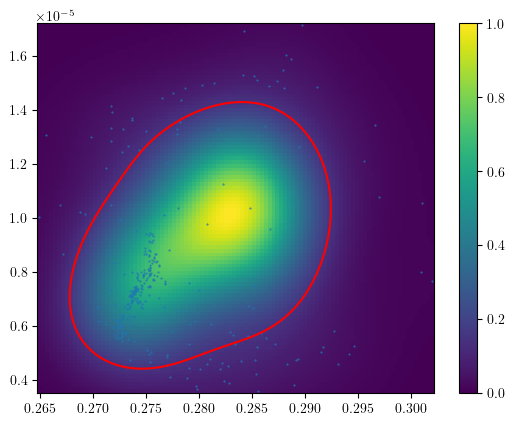

In [169]:
plt.pcolormesh(xx_2sigma_d, yy_2sigma_d, kde_2sigma_d[2])
plt.contour(xx_2sigma_d, yy_2sigma_d, kde_2sigma_d[2], levels=[0.15*np.max(kde_2sigma_d[2])], colors='r')
plt.scatter(RDs_2s_d, BKnunu_2s_d, s=0.2)
plt.colorbar()

In [170]:
RDs_bf = flavio.np_prediction('Rtaul(B->D*lnu)', rotBIII([-0.202955, -0.117640,0.608979]))
BKnunu_bf = flavio.np_prediction('BR(B+->Knunu)', rotBIII([-0.202955, -0.117640,0.608979]))

(0.0, 3.5e-05)

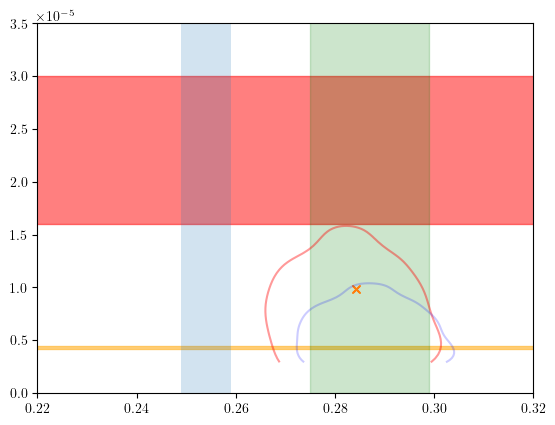

In [171]:
#plt.scatter(observables['RDs'], observables['BKnunu'], s=0.2)
plt.fill_between([0.2, 0.5], 2.3e-5-0.7e-5, 2.3e-5+0.7e-5, alpha=0.5, color='r')
plt.fill_between([0.2, 0.5], 0.429e-5-0.013e-5, 0.429e-5+0.013e-5, alpha=0.5, color='orange')
plt.fill_betweenx([0, 4e-5], 0.287 - 0.012 , 0.287 + 0.012 , alpha=0.2, color='g')
plt.fill_betweenx([0, 4e-5], 0.254 - 0.005, 0.254 + 0.005, alpha=0.2)
plt.contour(xx_1sigma, yy_1sigma, kde_1sigma[2], levels=[0.15*np.max(kde_1sigma[2])], colors='r', alpha=0.4)
plt.contour(xx_2sigma, yy_2sigma, kde_2sigma[2], levels=[0.15*np.max(kde_2sigma[2])], colors='b', alpha=0.2)
plt.scatter([RDs_bf], [BKnunu_bf], s=30, marker=r'$\times$')
plt.xlim(0.22, 0.32)
plt.ylim(0, 3.5e-5)

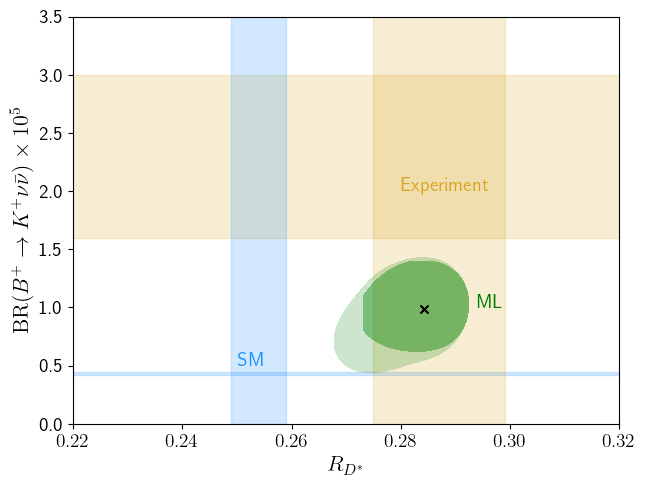

In [172]:
#plt.scatter(observables['RDs'], observables['BKnunu'], s=0.2)
plt.fill_between([0.2, 0.5], 2.3e-5-0.7e-5, 2.3e-5+0.7e-5, alpha=0.2, color='goldenrod')
plt.fill_between([0.2, 0.5], 0.429e-5-0.013e-5, 0.429e-5+0.013e-5, alpha=0.2, color='dodgerblue')
plt.fill_betweenx([0, 4e-5], 0.287 - 0.012 , 0.287 + 0.012 , alpha=0.2, color='goldenrod')
plt.fill_betweenx([0, 4e-5], 0.254 - 0.005, 0.254 + 0.005, alpha=0.2, color='dodgerblue')
plt.contourf(xx_1sigma_d, yy_1sigma_d, kde_1sigma_d[2], levels=[0.15*np.max(kde_1sigma_d[2]), np.max(kde_1sigma_d[2])], colors='g', alpha=0.4)
plt.contourf(xx_2sigma_d, yy_2sigma_d, kde_2sigma_d[2], levels=[0.15*np.max(kde_2sigma_d[2]), np.max(kde_2sigma_d[2])], colors='g', alpha=0.2)
plt.scatter([RDs_bf], [BKnunu_bf], s=30, marker=r'$\times$', c='k')
plt.xlim(0.22, 0.32)
plt.ylim(0, 3.5e-5)
plt.xlabel(r'$R_{D^*}$', fontsize=16)
plt.ylabel(r'$\mathrm{BR}(B^+\to K^+ \nu\bar{\nu})\times 10^5$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(np.linspace(0, 3.5e-5, 8), np.linspace(0, 3.5, 8), fontsize=14)
plt.annotate('SM', (0.25, 0.5e-5), color='dodgerblue', fontsize=14)
plt.annotate('Experiment', (0.28, 2.0e-5), color='goldenrod', fontsize=14)
plt.annotate('ML', (0.294, 1e-5), color='g', fontsize=14)
plt.tight_layout(pad=0.5)
plt.savefig('ML_prediction.pdf')

In [176]:
0.283-0.008

0.27499999999999997

In [133]:
SMEFT19.scenarios.idemp(0, 0.6409892)

matrix([[0.        , 0.        , 0.        ],
        [0.        , 0.29121605, 0.45432286],
        [0.        , 0.45432286, 0.70878395]])